In [441]:
import numpy as np
import matplotlib.pyplot as plt

from math import sin, exp, sqrt, cos

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [442]:
def my_range(start, end, step):
    while start <= end:
        yield start
        start += step

In [443]:
data = []
labels = []

for i in my_range(0, 10, 0.01):
    data.append([sin(i), cos(i)])
    labels.append(sqrt(1 + sin(i + (sin(i) ** 2))))
    
X_train = np.array(data[:900])
y_train = np.array(labels[:900])

X_test = np.array(data[901:])
y_test = np.array(labels[901:])

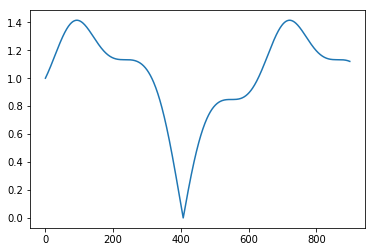

In [444]:
plt.plot(y_train)
plt.show()

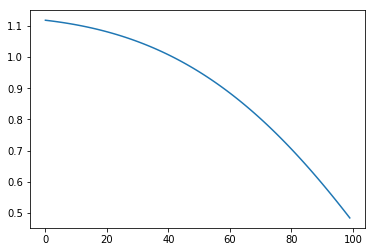

In [445]:
plt.plot(y_test)
plt.show()

<h2>Treinando o modelo</h2>

In [446]:
model = MLPRegressor(solver='lbfgs')

In [447]:
model.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

<h2>Predição</h2>

In [448]:
result = model.predict(X_test)

In [449]:
[coef.shape for coef in model.coefs_]

[(2, 100), (100, 1)]

In [450]:
print("Training set score: %f" % model.score(X_train, y_train))
print("Test set score: %f" % model.score(X_test, y_test))

Training set score: 0.999797
Test set score: 0.999734


<h2>Root Mean Square Error</h2>

Root Mean Square Error é uma métrica usada para medir as diferenças entre os valores reais e preditos pelo modelo.
Essa diferença é normalmente chamada de resíduos que são calculados a partir do desvio padrão dos erros de predição.

In [451]:
RMSE = mean_squared_error(y_test, result)**0.5
print("Erro médio nas predições: %f" % RMSE)

Erro médio nas predições: 0.003055


<h2>Predição considerando 1 passo a frente</h2>

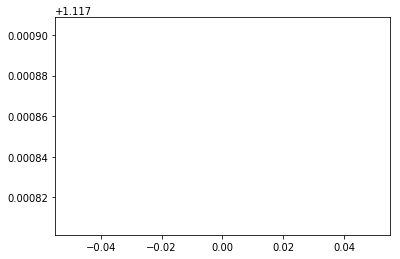

In [452]:
plt.plot(result[:1])
plt.plot(y_test[:1])
plt.show()

<h2>Predição considerando 10 passos a frente</h2>

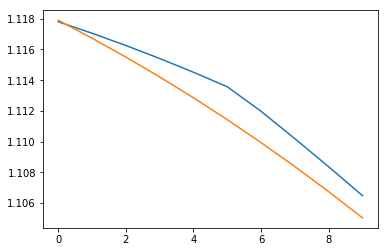

In [453]:
plt.plot(result[:10])
plt.plot(y_test[:10])
plt.show()

<h2>Predição considerando 100 passos a frente</h2>

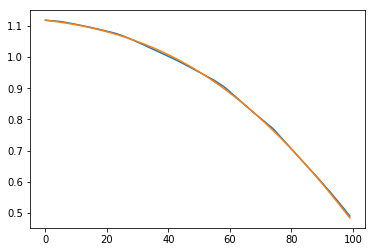

In [454]:
plt.plot(result[:100])
plt.plot(y_test[:100])
plt.show()